# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

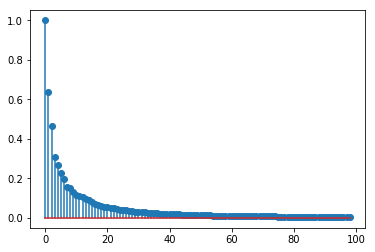

In [3]:
count=0
k=6
for i in range(6000):
    if(train_labels[i]==k):
        count+=1
a=np.zeros([count,784])
j=0
for i in range(6000):
    if(train_labels[i]==k):
        a[j]=train_data[i]
        j+=1
cov=np.cov(np.transpose(a))
v,e=np.linalg.eig(cov)
v=np.absolute(v)
ma=max(v)
mi=min(v)
for i in range(784):
    v[i]=(v[i]-mi)/(ma-mi)
plt.stem(v[0:99])
plt.show()

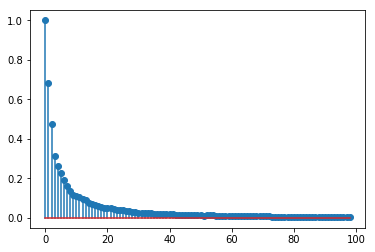

In [24]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
count=0
k=7
for i in range(6000):
    if(train_labels[i]==k):
        count+=1
a=np.zeros([count,784])
j=0
for i in range(6000):
    if(train_labels[i]==k):
        a[j]=train_data[i]
        j+=1
cov=np.cov(np.transpose(a))
v,e=np.linalg.eig(cov)
v=np.absolute(v)
ma=max(v)
mi=min(v)
for i in range(784):
    v[i]=(v[i]-mi)/(ma-mi)
plt.stem(v[0:99])
plt.show()

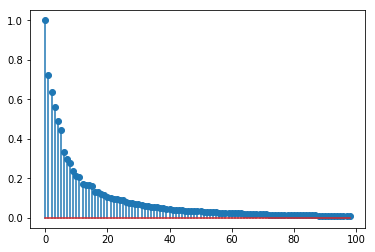

In [23]:
# All training data (plot c)
cov=np.cov(np.transpose(train_data))
v,e=np.linalg.eig(cov)
ma=max(v)
mi=min(v)
for i in range(784):
    v[i]=(v[i]-mi)/(ma-mi)
v=np.absolute(v)
plt.stem(v[0:99])
plt.show()

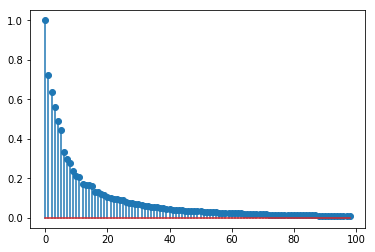

In [22]:
# Randomly selected 50% of the training data (plot d)
index = np.random.choice(train_data.shape[0], 3000, replace=False)
a=np.zeros([3000,784])
j=0
for i in index:
    a[j]=train_data[i]
    j+=1
cov=np.cov(np.transpose(train_data))
v,e=np.linalg.eig(cov)
ma=max(v)
mi=min(v)
for i in range(784):
    v[i]=(v[i]-mi)/(ma-mi)
v=np.absolute(v)
plt.stem(v[0:99])
plt.show()

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

1) The plots of a and b are different as we have considered different samples

2) The plots of b and c are also different as we have considered all of training data in part-c

3) All the 784 dimensions are not independent as evident from the covariance matrix. So the most of the information lies in a lower dimension subspace. The eigen vectors of the covariance matrix represent the directions in which the spread happens i.e the direction which has the most variance. Since all the plots belong to the same distribution/structure, they have similar eigen spectrum. Rank is greater than or equal to the number of non zero eigen values. We can approximate Rank to be equal to number of non zero eigenvalues greater than a small threshold.

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?


1)Each pixel can take 2 values, 0 or 1. So we have a total of 2^784 images possible

2)Percentage of images accessible to us in MNIST are (600/2^784)*100=5.89704e-231

3)If we had all the data (collection of all images), then there will be no correlation between any two pixels. The covariance matrix will be a approximate diagonal matrix (since covariance of uncorrelated random variables is equal to zero). All the diagonal values (represent variance) are equal. This implies that eigen values are approximately equal.



## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

Orthonormal matrices have full rank. Hence the columns of the matrix can act as orthonormal basis. If we change the basis, then the eigen vectors will change but not the eigen values i.e the orientation of vectors change but not the relative distance between them.

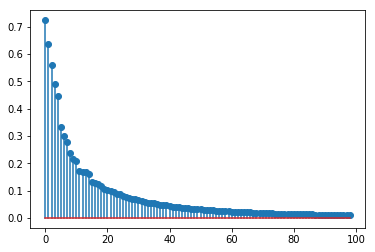

In [21]:
from numpy import linalg
A=np.random.randn(784,784)
B=np.dot(A,A.T)
eig_value,eig_vector=linalg.eig(B)
Q=eig_vector
x=np.dot(train_data,Q)
y=np.transpose(x)
cov_mat=np.cov(y)
eigen_value,eigen_vector=linalg.eig(cov_mat)
eigen_value=abs(eigen_value)
ma=np.max(eigen_value)
eigen_value=eigen_value/ma
plt.stem(eigen_value[1:100])
plt.show()

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

We know that No. of nonzero eigen values of a matrix are less than or equal to rank of the matrix. Rank(AB)<=Rank(A).Rank(B) When we multiply with a rank deficient matrix, the rank of subsequent matrix is less than or equal to two. So no. of non zero eigen values is less than or equal to 2.

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

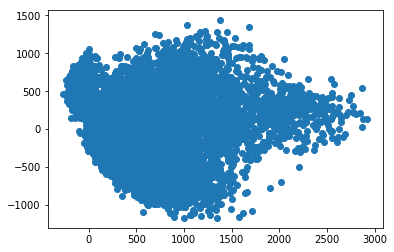

In [19]:
# Plotting code here
cov_mat=np.cov(np.transpose(train_data))
v_all,e=np.linalg.eig(cov_mat)
v=np.zeros((784,2))
v[:,0]=e[:,0].real
v[:,1]=e[:,1].real
out=train_data.dot(v)
a=out[:,0]
b=out[:,1]
plt.scatter(a,b)
plt.show()

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [44]:
# Print accuracy on the test set using MLE
cov_inv=np.zeros((10,784,784))
mean = np.zeros((10,784))
det =np.zeros(10)
samples=np.zeros([600,784])
for i in range(10):
    k=0
    for j in range(6000):
        if(train_labels[j]==i):
            samples[k]=train_data[j]
            k+=1
    mean[i] = np.mean(samples,axis=0)
    v,e = np.linalg.eig(np.cov(samples.T))
    v = v.real
    r = np.linalg.matrix_rank(np.cov(samples.T))
    cov_inv[i]=np.array(np.linalg.pinv(np.cov(samples.T)),dtype=np.float64)
    det[i] = np.sum(np.log(v[:r]))
count = 0
val=np.zeros(10)
for i in range(1000):
    for j in range(10):
        val[j]= det[j] + ((test_data[i]-mean[j]).dot(cov_inv[j])).dot((test_data[i]-mean[j]).T)
    if np.argmin(val) == test_labels[i]:
        count += 1

print('accuracy=', count/10, '%')

accuracy= 74.4 %


In [46]:
cov_inv=np.zeros((10,784,784))
mean = np.zeros((10,784))
det =np.zeros(10)
samples=np.zeros([600,784])
for i in range(10):
    k=0
    for j in range(6000):
        if(train_labels[j]==i):
            samples[k]=train_data[j]
            k+=1
    mean[i] = np.mean(samples,axis=0)
    v,e = np.linalg.eig(np.cov(samples.T))
    v = v.real
    r = np.linalg.matrix_rank(np.cov(samples.T))
    cov_inv[i]=np.array(np.linalg.pinv(np.cov(samples.T)),dtype=np.float64)
    det[i] = np.sum(np.log(v[:r]))
count = 0
val=np.zeros(10)
for i in range(1000):
    for j in range(10):
        val[j]= det[j] + ((test_data[i]-mean[j]).dot(cov_inv[j])).dot((test_data[i]-mean[j]).T)
    if np.argmin(val) == test_labels[i]:
        count += 1

print('accuracy=', count/10, '%')

accuracy= 74.4 %


In [ ]:
count = 0

cov_inv = np.array([[None]*10]*10)
cov=np.zeros((10,784,784))
for i in range(10):
    k=0
    for j in range(6000):
        if(train_labels[j]==i):
            samples[k]=train_data[j]
            k+=1
    cov[i]=np.cov(samples.T)
for i in range(10):
    for j in range(i+1):
        if cov_inv[i][j] == None:
            v, e = np.linalg.eig((sigma[i]+sigma[j])/2)
            v = np.real(v)
            cov_inv[j][i] = cov_inv[i][j] = np.array(np.linalg.pinv(cov[i]),dtype=np.float64)

for i in range(1000):
    val,a,b = 10
    a=0
    b=1
    while True:
        d1=((test_data[i]-mean[a]).dot(cov_inv[a][b])).dot(test_data[i].T-mean[a].T)
        d2=((test_data[i]-mean[b]).dot(cov_inv[a][b])).dot(test_data[i].T-mean[b].T)
        if b != 9:
            if d1 > d2:
                a=b
            else:
                a=a
            b += 1
        else:
            if d1 < d2: 
                val=a
            else: 
                val=b
            break
    if val == test_labels[i]:
        count += 1

print('Accuracy=', count/10, '%')

In [8]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
cnt=0
mean=[0]*10
x=np.zeros([600,784])
for i in range(10):
    k=0
    for j in range(6000):
        if(train_labels[j]==i):
            x[k]=train_data[j]
            k+=1
    mean[i]=np.mean(x,axis=0)
for k in range(1000):
    check=np.zeros(10)
    sample=test_data[k]
    for i in range(10):
        for j in range(10):
            mid=(mean[i]+mean[j])/2
            bisector=np.dot(sample-mid,mean[j]-mean[i])
            if(bisector<0):
                check[i]+=1
            else:
                check[j]+=1       
    if(np.argmax(check)==test_labels[k]):
        cnt+=1
print("Accuracy is ", cnt/10)

Accuracy is  77.0


### 1.3.3 Question 4
Compare performances and salient observations

In this case as samples corresponding to each image are same in number map and mle both are same beacuse prior probability is same.
performance is more for bayesian pairwise as compared to others.

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [30]:
# Your code here
# Print accuracies with K = 1, 3, 7
k=3
a=np.zeros([1000,k])
d=np.zeros([6000,2])
final =np.zeros(1000)
for i in range(1000):
    p=test_data[i]
    for j in range(6000):
        t=train_data[j]
        d[j][0]=np.linalg.norm(p-t)
        d[j][1]=train_labels[j]
    d=d[d[:,0].argsort()]
    for z in range(k):
        a[i][z]=int(d[z][1])
accuracy=0
for i in range(1000):
    count=np.zeros(10)
    for j in range(k):
        count[int(a[i][j])]+=1
    ma=max(count)
    found=-1
    for z in range(k):
        if count[int(a[i][z])]==ma:
            found=int(a[i][z])
            break
    if(found==test_labels[i]):
        accuracy+=1
print(accuracy/10)

91.9


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

1) The slight difference in accuracies for different classes is due to noise data. When we are using a KNN algorithm for classification, and the algorithm encounters a tie, it doesn't have confidence which class to decide.

2) K value should be odd to avoid ties. Also we can take k as sqrt(N) where N is the no. of training data samples. A practical approach is to plot the accuracies for each value of k ranging from {1,2,.....N} and then select the appropriate k.

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [5]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [14]:
k=3
count = np.zeros(20)
d=np.zeros([6019,2])
for i in range(6000):
    for j in range(6019):
        if(j<6000):
            if(j!=i):
                d[j][0]=np.linalg.norm(train_data[i]-train_data[j])
                d[j][1]=j
        else:
            d[j][0]=np.linalg.norm(train_data[i]-mixed_data[j-6000])
            d[j][1]=j
    d=d[d[:,0].argsort()] 
    for z in range(k):
        if d[z][1]>5999: 
            count[int(d[z][1])-6000]=1

for i in range(20):
    if(count[i]==0):
        print("index",i,"is outlier")
    else:
        print("index",i,"is not outlier")

index 0 is outlier
index 1 is not outlier
index 2 is outlier
index 3 is not outlier
index 4 is outlier
index 5 is not outlier
index 6 is outlier
index 7 is outlier
index 8 is not outlier
index 9 is outlier
index 10 is not outlier
index 11 is outlier
index 12 is not outlier
index 13 is not outlier
index 14 is not outlier
index 15 is not outlier
index 16 is not outlier
index 17 is not outlier
index 18 is outlier
index 19 is outlier


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

We use KNN algorithm to find out mean of cleanliness Id's of k nearest neighbours for each row in test data. We then find out absolute difference between test label and cleanliness id.

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [18]:
# # Your code here
k=3
a=np.zeros([1000,k])
d=np.zeros([6000,2])
new_train_labels=train_labels/10
new_test_labels=test_labels/10
final =np.zeros(1000)
for i in range(1000):
    p=test_data[i]
    for j in range(6000):
        t=train_data[j]
        d[j][0]=np.linalg.norm(p-t)
        d[j][1]=new_train_labels[j]
    d=d[d[:,0].argsort()]
    for z in range(k):
        a[i][z]=d[z][1]
error=0
p=np.zeros(1000)
for i in range(1000):
    for j in range(k):
        p[i]+=a[i][j]
for i in range(1000):
    pr=p[i]/k
    t=new_test_labels[i]
    error+=np.absolute(pr-t)
print(error/1000)

0.03773333333333335


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---